In [2]:
import numpy as np
import matplotlib.pyplot as plt
import metrics as mt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [1]:
print(mt.mae([1, 2, 3], [1, 2, 3]))


NameError: name 'mt' is not defined

In [6]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


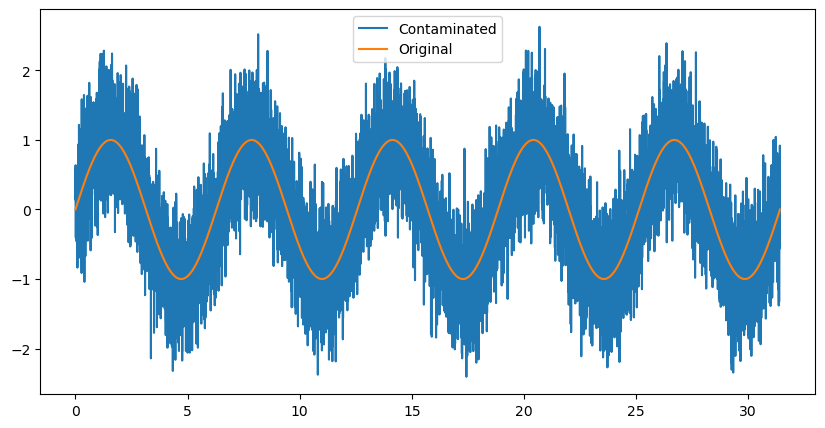

In [7]:
# Number of samples
N = 10000

# Generate a sine wave
t = np.linspace(0, 10*np.pi, N)
original_signal = np.sin(t)

# Add some noise
noise = np.random.normal(0, 0.5, N)
contaminated_signal = original_signal + noise

# Plot the original and the contaminated signals
plt.figure(figsize=(10,5))
plt.plot(t, contaminated_signal, label="Contaminated")
plt.plot(t, original_signal, label="Original")
plt.legend()
plt.show()


In [8]:
def create_sequences(input_data, output_data, seq_length):
    xs = []
    ys = []
    
    for i in range( len( input_data ) - seq_length ):
        x = input_data[i:(i+seq_length)]
        y = output_data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 75
X, y = create_sequences(contaminated_signal, original_signal, seq_length)

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Reshape the inputs for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()

# First LSTM layer with reduced dropout and L1 regularization
model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True,
               dropout=0.05, recurrent_dropout=0.05, 
               kernel_regularizer=l1(0.0001), recurrent_regularizer=l1(0.0001)))
"""
# Second LSTM layer with reduced dropout and L1 regularization
model.add(LSTM(256, return_sequences=True, 
               dropout=0.05, recurrent_dropout=0.05,
               kernel_regularizer=l1(0.0001), recurrent_regularizer=l1(0.0001)))

# Third LSTM layer with reduced dropout and L2 regularization
model.add(LSTM(128, return_sequences=True, 
               dropout=0.05, recurrent_dropout=0.05,
               kernel_regularizer=l2(0.0001), recurrent_regularizer=l2(0.0001)))
"""
# Fourth LSTM layer with reduced dropout and L2 regularization
model.add(LSTM(64, return_sequences=False, 
               dropout=0.05, recurrent_dropout=0.05,
               kernel_regularizer=l2(0.0001), recurrent_regularizer=l2(0.0001)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=Adam())

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), shuffle=False)


Epoch 1/10
249/249 [==============================] - 78s 283ms/step - loss: 0.0979 - val_loss: 0.0420
Epoch 2/10
249/249 [==============================] - 69s 277ms/step - loss: 0.0319 - val_loss: 0.0218
Epoch 3/10
249/249 [==============================] - 71s 285ms/step - loss: 0.0201 - val_loss: 0.0154
Epoch 4/10
249/249 [==============================] - 70s 282ms/step - loss: 0.0159 - val_loss: 0.0130
Epoch 5/10
249/249 [==============================] - 70s 280ms/step - loss: 0.0139 - val_loss: 0.0112
Epoch 6/10
249/249 [==============================] - 76s 304ms/step - loss: 0.0127 - val_loss: 0.0104
Epoch 7/10
249/249 [==============================] - 73s 292ms/step - loss: 0.0120 - val_loss: 0.0100
Epoch 8/10
249/249 [==============================] - 74s 295ms/step - loss: 0.0117 - val_loss: 0.0095
Epoch 9/10
249/249 [==============================] - 71s 284ms/step - loss: 0.0113 - val_loss: 0.0092
Epoch 10/10
249/249 [==============================] - 75s 300ms/step - l

In [10]:
# Create sequences for all data
X_all, y_all = create_sequences(contaminated_signal, original_signal, seq_length)

# Reshape the inputs for LSTM
X_all = np.reshape(X_all, (X_all.shape[0], X_all.shape[1], 1))

# Make predictions on all data
y_pred_all = model.predict(X_all)

# Shift the predicted data
y_pred_all_shifted = np.roll(y_pred_all, shift=seq_length, axis=0)

# Since we can't predict the first 'seq_length' samples with this method, we can just set them to zero
y_pred_all_shifted[:seq_length] = 0

# Now 'y_pred_all_shifted' should be directly comparable with 'original_signal'.


311/311 [==============================] - 15s 47ms/step


In [11]:
# Trim the original signal to match the predicted signal
original_signal_trimmed = original_signal[seq_length:-seq_length]

# Now original_signal_trimmed and y_pred_all should have the same shape

In [12]:
mape_1 = MAPE(original_signal_trimmed, y_pred_all)
print("MAPE: ", mape_1)

MAPE:  392.17611988102334


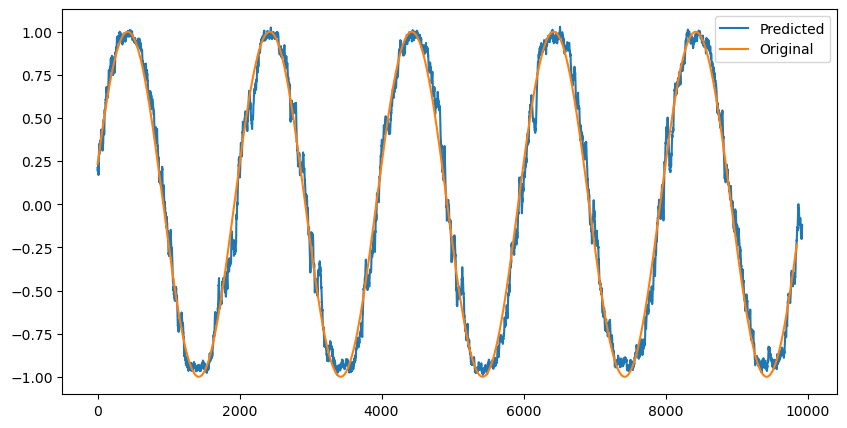

In [13]:
# Plot the predicted vs trimmed original signal
plt.figure(figsize=(10,5))
plt.plot(y_pred_all, label="Predicted")
plt.plot(original_signal_trimmed, label="Original")
plt.legend()
plt.show()

# Implicaciones del uso de L1 y Dropout

Al momento de agregar estas 2 herramientas se crean "valles" en los picos de las señales, pero a pesar de esto estas 2 tecnicas tienen efectos positivos en el indice de RMSE

# Resultados de aumento en la complejidad

Se observa una mejora considerable en los resultados al aumentar la cantidad de capas y neuronas

Remuestrear señales